In [ ]:
#! pip install scikit-learn pandas numpy graphviz matplotlib scipy 

In [2]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [6]:
wine = load_wine()
print(wine.data.shape)
print(wine.target)

(178, 13)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
import pandas as pd
df = pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)
print('feature_names =', wine.feature_names)
print('target_names =', wine.target_names)
df.describe()

feature_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
target_names = ['class_0' 'class_1' 'class_2']


,0,1,2,3,4,5,6,7,8,9,10,11,12,0
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)
print('Xtrain.shape =', Xtrain.shape)
print('Xtest.shape =', Xtest.shape)

Xtrain.shape = (124, 13)
Xtest.shape = (54, 13)


In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain, ytrain)
score = clf.score(Xtest, ytest)
print('score =', score)

score = 0.9259259259259259


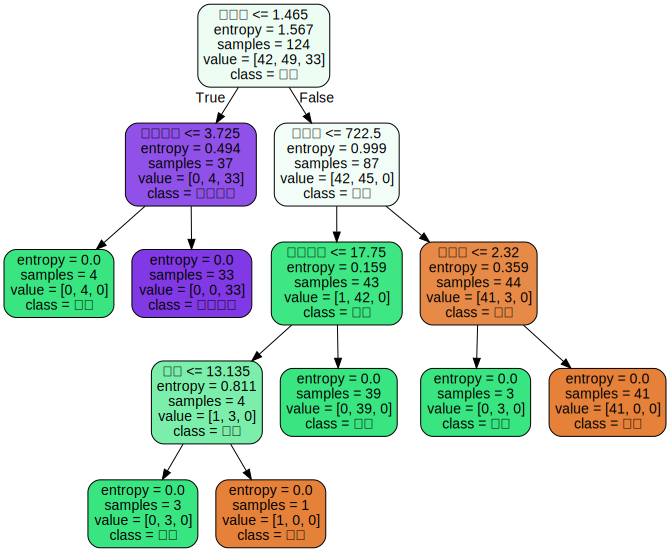

In [23]:
# draw map
feature_names = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素',
                '颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz

dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=feature_names,
                                class_names=["琴酒","雪莉","贝尔摩德"],
                                filled=True,
                                rounded=True)

# ubuntu: apt install graphviz
graph = graphviz.Source(dot_data)
graph


In [26]:
[*zip(feature_names,clf.feature_importances_)]

[('酒精', 0.016705234725533532),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.01856785633250174),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.5397357226187213),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.09412658309760731),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.33086460322563616)]

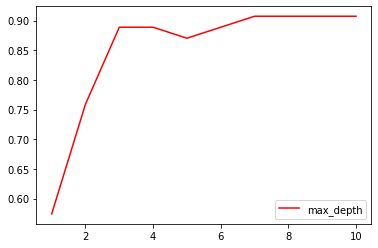

In [29]:
import matplotlib.pyplot as plt

purning_test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1,
                                      criterion='entropy',
                                      random_state=30,
                                      splitter='random')
    clf = clf.fit(Xtrain, ytrain)
    purning_test.append(clf.score(Xtest, ytest))

plt.plot(range(1,len(purning_test)+1), purning_test, color='red', label='max_depth')
plt.legend()
plt.show()